In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [15]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()
xtrain, ytrain = xtrain/255, ytrain/255

In [16]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape) # To convert it to grayscale

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

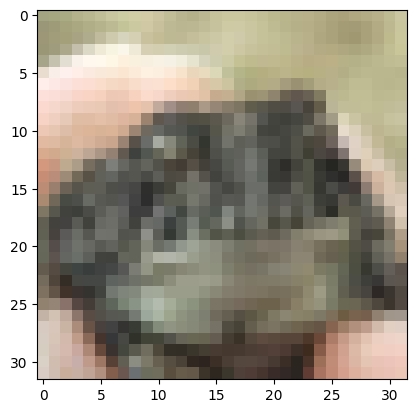

In [18]:
plt.imshow(xtrain[25])
label = ytrain[25]
# print(class_names[label[0]])

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')),
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(xtrain, ytrain, validation_split = 0.1, epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 64ms/step - accuracy: 0.1003 - loss: 0.0325 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 115s 44ms/step - accuracy: 0.1018 - loss: 5.2384e-12 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.0991 - loss: 7.0709e-12 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.1039 - loss: 4.1052e-11 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.0979 - loss: 3.1143e-12 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.0979 - loss: 9.1264e-12 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.0972 - loss: 1.1875e-13 - val_accuracy: 0.0986 - val_loss: 0.0000e+00
Epoch 8/10
1407/1407 ━━

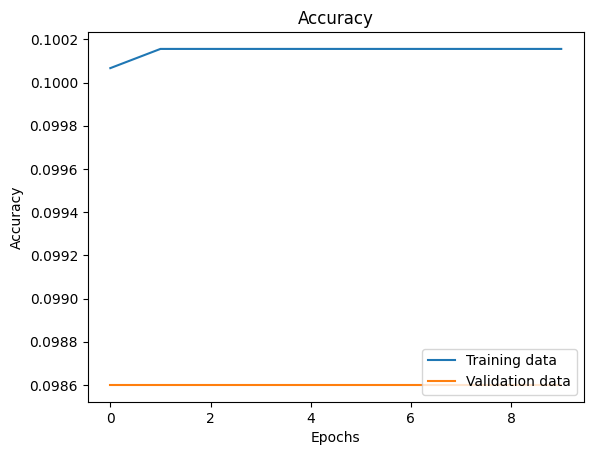

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')
plt.show()

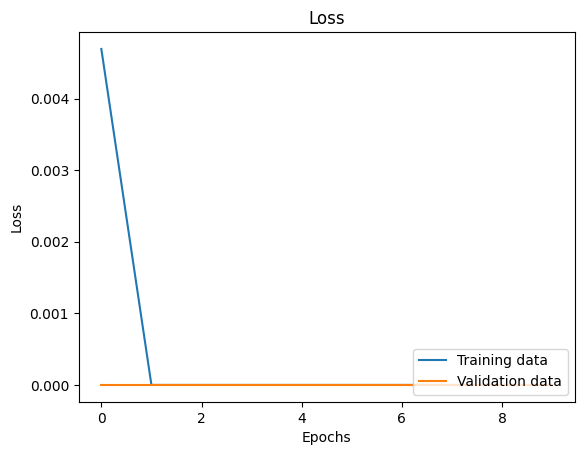

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')
plt.show()

In [27]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis = 1)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ypred, ytest))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Accuracy:  0.1


In [28]:
ytest[2004]

array([7], dtype=uint8)

In [29]:
ypred[2004]

np.int64(0)

Text(0.5, 1.0, 'ytest: [8], ypred: 0')

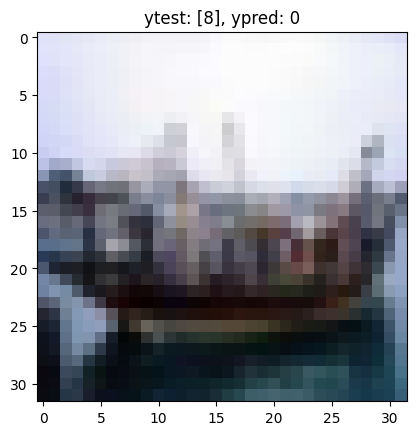

In [32]:
plt.imshow(xtest[18], cmap = 'grey')
plt.title(f"ytest: {ytest[18]}, ypred: {ypred[18]}")